# Lecture 16 Numerical methods for inverse problems I

## Objectives

+ Objective 1: Employ optimization algorithms for inverse problems
+ Objective 2: Apply TSVD,SSVD and tikhonov regularization for inverse problems


## Readings

+ Numerical Methods for Inverse Problems (Curti R. Vogel)

+ Numerical Linear Algebra (http://www.amazon.com/Numerical-Linear-Algebra-Lloyd-Trefethen/dp/0898713617) by Nick Trefethen

+ Rank-Deficient And Discrete Ill-Posed Inverse Problems (http://www.amazon.com/Rank-Deficient-Discrete-Ill-Posed-Problems-Mathematical/dp/0898714036) by Per Christian Hansen

+ http://en.wikipedia.org/wiki/Condition_number
+ http://en.wikipedia.org/wiki/Least_squares
+ http://en.wikipedia.org/wiki/Singular_value_decomposition
+ http://en.wikipedia.org/wiki/Tikhonov_regularization
+ http://en.wikipedia.org/wiki/Matrix_decomposition


![](figures/i46.png)

![](figures/i47.png)

![](figures/i48.png)

![](figures/i49.png)

![](figures/i50.png)

![](figures/i38.png)

![](figures/i39.png)

![](figures/i1.png)

![](figures/i2.png)

![](figures/i3.png)

![](figures/i4.png)

![](figures/i5.png)

![](figures/i6.png)

![](figures/i7.png)

![](figures/i8.png)

![](figures/i9.png)

![](figures/i10.png)

![](figures/i11.png)

![](figures/i12.png)

![](figures/i13.png)

![](figures/i14.png)

![](figures/i15.png)

![](figures/i40.png)

![](figures/i41.png)

![](figures/i42.png)

![](figures/i43.png)

![](figures/i44.png)

In [1]:
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, formatter={'float_kind':'{:3f}'.format}) 

Discrete ill-posed inverse problems
--------------------------------------

Simple example system of equations:

$$x + 3 y = 2$$

$$4x - y = 1$$

Representable as the system:


$$\begin{pmatrix}
1 & 3\\
4 & -1
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
2\\
1
\end{pmatrix}$$

or 

$$Ax = b$$


- If $A$ has an inverse matrix $A^{-1}$ that is available, then $x = A^{-1} b$.

- If $A$ is not invertible (i.e. a singular matrix), a generalized inverse (or pseudo-inverse) $A^{\dagger}$ can be defined to allow for an approximated solution $x = A^{\dagger} b$.

- Problems with measurement noise can be written as $Ax = b + e$, where exact data $b$ and noise sources $e$ cannot be practically separated from each other

- What we are usually after practically is something along the lines of

$$\min_x||Ax - b||_2$$

In [2]:
# A nice well-posed problem
# easy to compute direct solution, even when there is noise
A = np.array([[1, 3],
           [4, -1]])

b = [2, 1]

x = np.linalg.solve(A, b + 0.001*np.random.randn(2))

display(A.dot(x))

array([2.001380, 0.998775])

In [4]:
# a singular (rank-deficient) problem: no unique solution. But minimum-norm least squares solution exists.
@interactive(n=(4,10))
def g(n=5):
    #change n from 4 to 10 and compare b and A*x 
    A = np.random.randn(n,n)
    #A[1] = A[0] + A[1]
    A[3] = A[1] - A[2]
    b = np.arange(n)
    
    #x = linalg.solve(A, b)
    x = np.linalg.lstsq(A,b)[0]
    
    print "b=", b
    print "A * x = "
    display(A.dot(x).astype(float))
    #print
    #print "condition number:", linalg.cond(A)
    #u,s,v = linalg.svd(A, full_matrices=False)
    #plot(s)  

TypeError: interactive() takes exactly 1 argument (0 given)

Posedness
-----------

A mathematical problem is said to be *well-posed* (in the sense of Hadamard) if: 

1. There exists a solution
2. The solution is unique
3. The solution depends continuously upon input data


Example: 1st-Type Fredholm Integral equations
-------------------
As an example, consider solving the integral equation:
$$\int_\Omega K\left(x, s \right) f\left(s \right) ds = g\left(x \right)$$
If a solution $f$ is perturbed by:

$$\Delta f_p =\varepsilon \sin \left( {2\pi ps} \right) $$

for some non-zero constant $ \varepsilon$, then the corresponding perturbation on the right-hand side is:

$$ \Delta g_p = \varepsilon\int\limits_\Omega {K\left( {x,s} \right)\sin \left( {2\pi ps} \right)ds}$$

By the Riemann-Lebesgue lemma, it follows that, for any $\varepsilon \ne 0$, this perturbation vanishes as $p \to \infty$, while the ratio of perturbations $\frac{{ {\Delta {f_p}}}}{{{\Delta {g_p}}}}$ will grow without bound.


![](figures/i16.png)

![](figures/i17.png)

![](figures/i18.png)

![](figures/i19.png)

![](figures/i20.png)

![](figures/i51.png)

![](figures/i52.png)

![](figures/i53.png)

![](figures/i54.png)

![](figures/i55.png)

![](figures/i56.png)

![](figures/i57.png)

![](figures/i58.png)

Truncated SVD regularization:
--------------------------------

If $A$ is invertible, then 

$$A^{-1} = V \Sigma^{-1} U^T = {\sum {\frac{{{v_i}u_i^T}}{{{\sigma _i}}}} }$$
where $\Sigma^{-1}$ is just $\Sigma$ with each non-zero singular value inverted.

Otherwise, we can compute a rank-k pseudoinverse $A^{\dagger}_k$:

$$A^{\dagger}_k=  {\sum\limits_{i = 1}^k {\frac{{{v_i}u_i^T}}{{{\sigma _i}}}} }$$

Direct application of this pseudoinverse to the data $b+e$ gives the TSVD solution

$$\hat x_k=A^{\dagger}_k \left(b+e \right) = \sum\limits_{i = 1}^k {\frac{{u_i^Tb}}{{{\sigma _i}}}{v_i}}  + \frac{{u_i^Te}}{{{\sigma _i}}}{v_i}.$$

 If $A$ is an ill-conditioned matrix, the terms $\frac{{u_i^Te}}{{{\sigma _i}}}{v_i}$ related to the  noise may dominate for small singular values 
 
 Solution: truncate the sum early enough that the error terms are not amplified! 
 
 This process of replacing the original problem with one more suitable for numerical treatment is called regularization, and the truncation index $k$ is called a regularization parameter.

![](figures/i59.png)

![](figures/i60.png)

![](figures/i61.png)

![](figures/i62.png)

![](figures/i63.png)

![](figures/i64.png)

![](figures/i65.png)

![](figures/i66.png)

![](figures/i67.png)

![](figures/i21.png)

![](figures/i22.png)

![](figures/i23.png)

![](figures/i24.png)

![](figures/i25.png)

![](figures/i26.png)

![](figures/i27.png)

![](figures/i28.png)

![](figures/i29.png)

![](figures/i68.png)

![](figures/i69.png)

![](figures/i70.png)

![](figures/i71.png)

![](figures/i72.png)

![](figures/i73.png)

![](figures/i74.png)

![](figures/i75.png)

![](figures/i76.png)

![](figures/i77.png)

![](figures/i78.png)

For discrete ill-posed problems:
-------------------------------

For the problem $Ax = b + e$, consider the SVD of A:

$$A = U \Sigma V^T$$

where $U$ and $V$ are unitary matrices, and $\Sigma$ is a matrix with non-zero singular values along the diagonal. The number of non-zero singular values is called the rank of A, and is equal to the number of linearly independant columns or rows.

The ratio of the largest (first) singular value to the smallest is called the condition number of $A$.

A rank $k$ approximation $A_k$ of $A$ can be obtained from the SVD as
$${A_k} = \sum\limits_{i = 1}^k {{\sigma _j}{u_j}v_j^T}, $$
with $\sigma_{1} \ge \sigma_{2} \ge \ldots \ge \sigma_{k} \ge 0$. 


Loaded image:


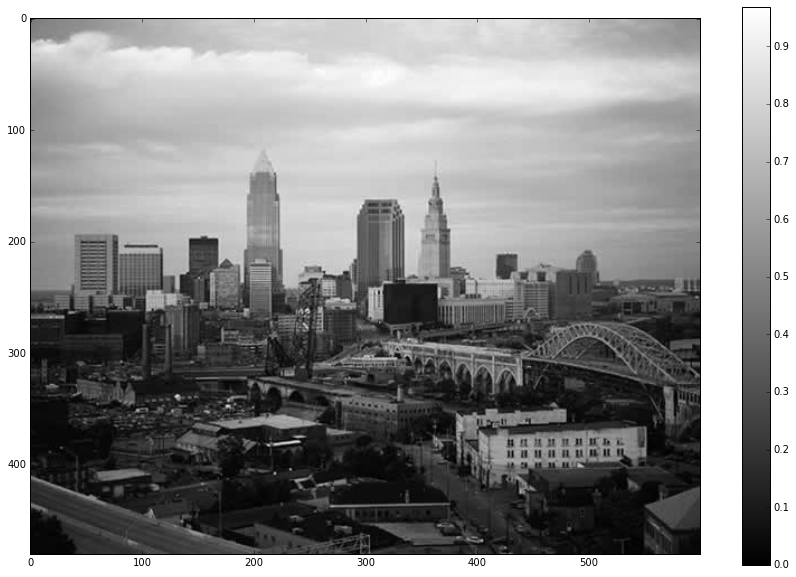

In [90]:
# Highly unstable problem: image deblurring (deconvolution)
print "Loaded image:"
from scipy import misc
original = plt.imread("figures/cleveland.png").mean(axis=2)
m,n = original.shape
plt.figure(figsize=(15, 10))
plt.imshow(original, cmap = plt.get_cmap('gray'))
_=plt.colorbar()

(480L, 600L)


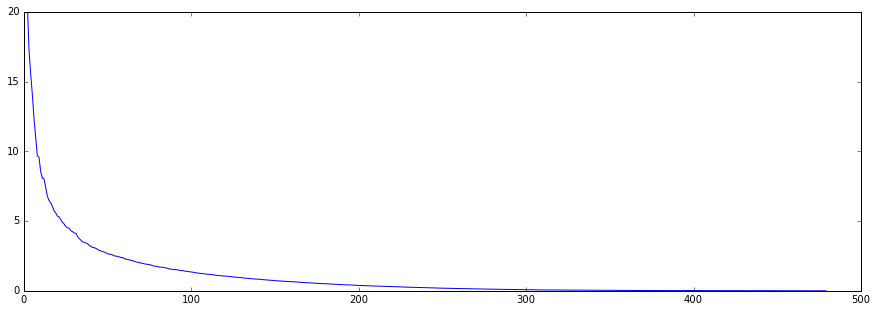

In [56]:
print original.shape
u, s, v = np.linalg.svd(original)
plt.figure(figsize=(15, 5))
plt.ylim(0,20)
plt.plot(s)

Below are some plots of ${{\sigma _j}{u_j}v_j^T}$ for $i = 1$ to $20$

First few singular components:


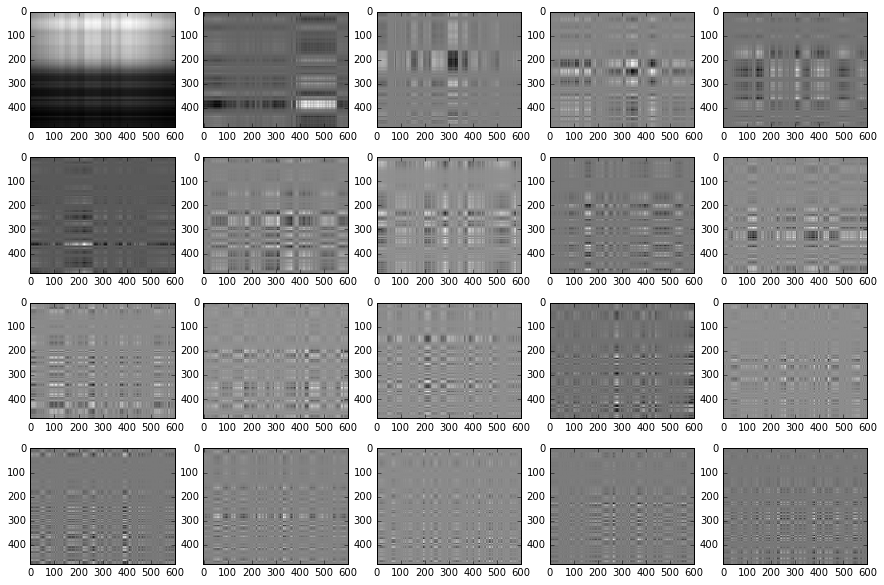

In [63]:
plt.figure(figsize=(15,10))
print "First few singular components:"
for i in xrange(20):
    pic = s[i]*np.outer(u.T[i], v[i])
    plt.subplot(4,5,i+1)
    plt.imshow(pic, cmap = plt.get_cmap('gray'))


compression : 0.375 %


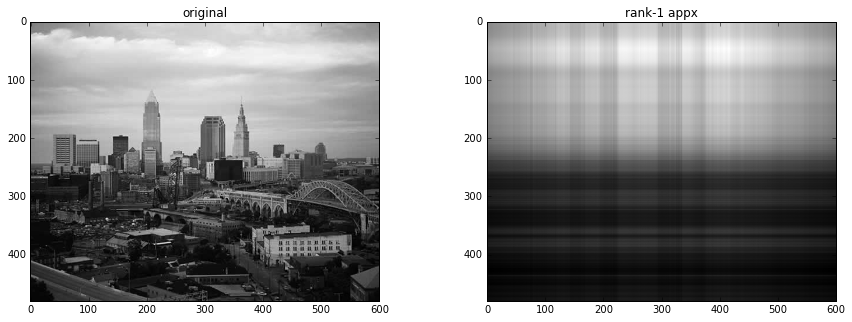

In [67]:
@widgets.interact(r=(1, 200))
def show_rank(r=1):
    Ar = np.zeros((len(u), len(v)))

    for i in xrange(r):
        Ar += s[i] * np.outer(u.T[i], v[i])

    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.title("original")
    plt.imshow(original, cmap = plt.get_cmap('gray'))
    plt.subplot(122)
    plt.title("rank-"+str(r)+" appx")
    plt.imshow(Ar, cmap = plt.get_cmap('gray'))
    print
    print "compression :", 100* r*sum(original.shape) / float(np.prod(original.shape)), "%"
    

![](figures/i30.png)

![](figures/i31.png)

![](figures/i32.png)

![](figures/i33.png)

![](figures/i34.png)

![](figures/i35.png)

![](figures/i36.png)

![](figures/i37.png)

Related topics:

- Numerical solvers for linear equations & eigenvalues
- Regularization methods (SVD, Tikhonov, LSQR, GMRES, etc)
- Numerical optimization (problem formulation, LP, SQP, etc)
- Heuristic computing (Simulated annealing, genetic algorithms, etc)
- Calculus of variations w/applications
- Signal processing (FFT, DCT, Wavelets, etc)
- Image processing (denoising, deblurring, compression, etc)
- Machine learning (SVM, neural nets, k-means, etc)
- Computer vision (object detection, feature extraction, OCR, etc)
- Graph theory (centrality measures, Dijkstra's method, A*, etc)
- Control theory (PID, Kalman filtering, etc)
- Dynamical systems (predator-prey, chaos theory, etc)
- Bayesian estimation
- Prime number theory
- Cellular automata
- Blind source separation (PCA, ICA, etc.)
- Concurrent computing (parallel processing, distributed computing, CUDA, FPGAs, etc)